In [6]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [7]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%%R
texas <- read.csv("texas_complete_data.csv")
pop <- read.csv("TXpopulation_2022.csv")

In [9]:
%%R
library(dplyr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [10]:
%%R
tx_combined <- texas %>%
  left_join(pop, by = "county")

In [11]:
%%R
tx_combined <- tx_combined %>%
  mutate(hiv_rate_per_100k = (X..HIV.Cases / july1_2022_pop_est) * 100000)

In [12]:
%%R
head(tx_combined)

     county X..HIV.Cases County.Value.. GEOID unemployment_rate less_than_hs
1  Anderson          297            586 48001         3.2262935   0.00000000
2   Andrews           16            112 48003         3.7364451   0.00000000
3  Angelina          185            260 48005         6.6302433   0.03666521
4   Aransas           36            169 48007         7.4674712   0.00000000
5    Archer           NA             NA 48009         2.8184400   0.00000000
6 Armstrong           NA             NA 48011         0.9988901   0.28571429
   hs_only some_college_or_associates bachelors_or_higher poverty_rate
1 27.11240                   18.85770            10.61013    14.877785
2 28.22430                   12.54206            12.20561     9.187259
3 25.01964                   14.31165            16.92536    17.744450
4 23.10102                   15.58899            21.87605    21.300374
5 30.95975                   11.99283            23.90419    11.946340
6 19.28571                   14.214

In [13]:
%%R
tx_cleaned <- tx_combined %>%
  select(
    county,
    GEOID,
    X..HIV.Cases,
    july1_2022_pop_est,
    hiv_rate_per_100k,
    poverty_rate,
    unemployment_rate,
    uninsured_percent,
    bachelors_or_higher,
    less_than_hs,
    hs_only,
    some_college_or_associates
  )

In [14]:
%%R
head(tx_cleaned)

     county GEOID X..HIV.Cases july1_2022_pop_est hiv_rate_per_100k
1  Anderson 48001          297              57573         515.86681
2   Andrews 48003           16              18732          85.41533
3  Angelina 48005          185              86380         214.16995
4   Aransas 48007           36              24945         144.31750
5    Archer 48009           NA               8652                NA
6 Armstrong 48011           NA               1848                NA
  poverty_rate unemployment_rate uninsured_percent bachelors_or_higher
1    14.877785         3.2262935                20            10.61013
2     9.187259         3.7364451                24            12.20561
3    17.744450         6.6302433                23            16.92536
4    21.300374         7.4674712                23            21.87605
5    11.946340         2.8184400                19            23.90419
6     9.157895         0.9988901                17            22.78571
  less_than_hs  hs_only som

In [15]:
%%R
#povertyvsHIVrate
model1 <- lm(hiv_rate_per_100k ~ poverty_rate, data = tx_cleaned)
summary(model1)
#A super low r-squared indicates no correlation. The high p-value backs up that conclusion.


Call:
lm(formula = hiv_rate_per_100k ~ poverty_rate, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-209.73  -94.95  -52.99    6.29 2741.78 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  211.4254    47.3633   4.464 1.31e-05 ***
poverty_rate  -0.6977     2.7756  -0.251    0.802    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 244.2 on 211 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.0002994,	Adjusted R-squared:  -0.004439 
F-statistic: 0.06319 on 1 and 211 DF,  p-value: 0.8018



In [16]:
%%R
#educationlevel(bach or higher)vsHIVrate
model2 <- lm(hiv_rate_per_100k ~ bachelors_or_higher, data = tx_cleaned)
summary(model2)
#Super low r squared shows no real relationship, the p value concludes that the low correlation
#did not just happen by chance, too. 


Call:
lm(formula = hiv_rate_per_100k ~ bachelors_or_higher, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-223.67  -96.64  -54.10    7.53 2701.08 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          151.497     43.862   3.454 0.000668 ***
bachelors_or_higher    2.503      2.081   1.203 0.230418    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 243.4 on 211 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.006809,	Adjusted R-squared:  0.002102 
F-statistic: 1.447 on 1 and 211 DF,  p-value: 0.2304



In [17]:
%%R
#uninsuredvsHIVrate
model3 <- lm(hiv_rate_per_100k ~ uninsured_percent, data = tx_cleaned)
summary(model3)
#another extremely low correlation shown by the r squared. P value shows that the chance of correlation is not 
#significant. 


Call:
lm(formula = hiv_rate_per_100k ~ uninsured_percent, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-285.54  -98.04  -55.46   11.97 2692.19 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        344.803    101.140   3.409  0.00079 ***
uninsured_percent   -6.585      4.720  -1.395  0.16458    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 249.1 on 198 degrees of freedom
  (54 observations deleted due to missingness)
Multiple R-squared:  0.009733,	Adjusted R-squared:  0.004731 
F-statistic: 1.946 on 1 and 198 DF,  p-value: 0.1646



In [18]:
%%R
#unemploymentvsHIVrate
model4 <- lm(hiv_rate_per_100k ~ unemployment_rate, data = tx_cleaned)
summary(model4)
#R value is so low, indicates essentially no correlation. p value just is that there's no meaningful evidence
#that shows a relationship.


Call:
lm(formula = hiv_rate_per_100k ~ unemployment_rate, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.47  -95.49  -51.83    5.91 2748.14 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        205.896     41.427   4.970 1.38e-06 ***
unemployment_rate   -1.047      7.075  -0.148    0.882    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 244.3 on 211 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.0001038,	Adjusted R-squared:  -0.004635 
F-statistic: 0.0219 on 1 and 211 DF,  p-value: 0.8825



In [19]:
%%R
borden_data <- tx_cleaned %>%
  filter(county == "Borden")

In [20]:
%%R
print(borden_data)

  county GEOID X..HIV.Cases july1_2022_pop_est hiv_rate_per_100k poverty_rate
1 Borden 48033           17                576          2951.389     2.610114
  unemployment_rate uninsured_percent bachelors_or_higher less_than_hs  hs_only
1          2.531646                13            39.47368            0 15.07177
  some_college_or_associates
1                   11.24402


In [21]:
%%R
county_comparison <- tx_cleaned %>%
  mutate(is_borden = ifelse(county == "Borden", "Borden County", "Other Counties")) %>%
  arrange(desc(hiv_rate_per_100k))

In [22]:
%%R
top_10_counties <- county_comparison %>%
  top_n(10, hiv_rate_per_100k) %>%
  select(county, hiv_rate_per_100k, X..HIV.Cases, july1_2022_pop_est, 
         poverty_rate, uninsured_percent, bachelors_or_higher)

In [23]:
%%R
print(top_10_counties)

    county hiv_rate_per_100k X..HIV.Cases july1_2022_pop_est poverty_rate
1   Borden         2951.3889           17                576     2.610114
2    Garza          905.7363           54               5962    19.700570
3   Walker          883.2326          694              78575    22.403795
4   Reeves          851.9927          121              14202    15.045885
5     Frio          807.4195          148              18330    23.256412
6   Dallas          746.3528        19597            2625702    15.358457
7  Willacy          631.1186          127              20123    26.969174
8   Concho          627.0529           21               3349    12.209567
9   Harris          578.1155        27828            4813571    15.708874
10  Howard          526.8798          177              33594    17.334812
   uninsured_percent bachelors_or_higher
1                 13           39.473684
2                 23           13.883344
3                 20           20.818937
4                 23  

In [24]:
%%R
avg_poverty <- tx_cleaned %>%
  summarize(
    avg_poverty_rate = mean(poverty_rate, na.rm = TRUE),
    median_poverty_rate = median(poverty_rate, na.rm = TRUE),
    min_poverty_rate = min(poverty_rate, na.rm = TRUE),
    max_poverty_rate = max(poverty_rate, na.rm = TRUE)
  )

In [25]:
%%R
print(avg_poverty)


  avg_poverty_rate median_poverty_rate min_poverty_rate max_poverty_rate
1         15.74253            15.04912         2.428811         41.44226


In [26]:
%%R
tx_averages <- tx_cleaned %>%
  summarize(
    avg_hs_only = mean(hs_only, na.rm = TRUE),
    avg_bachelors_or_higher = mean(bachelors_or_higher, na.rm = TRUE),
    avg_uninsured_percent = mean(uninsured_percent, na.rm = TRUE),
    avg_unemployment_rate = mean(unemployment_rate, na.rm = TRUE),
    avg_hiv_cases = mean(X..HIV.Cases, na.rm = TRUE),
    avg_hiv_rate_per_100k = mean(hiv_rate_per_100k, na.rm = TRUE)
  )
print(tx_averages)

  avg_hs_only avg_bachelors_or_higher avg_uninsured_percent
1     25.8869                19.05931              21.25877
  avg_unemployment_rate avg_hiv_cases avg_hiv_rate_per_100k
1              5.208134      465.0047              200.2874


In [27]:
#woah, so interestingly enough, Borden, the county with the highest HIV rates, 
#actually has a way higher bachelor's population versus the average. It also has a way 
#lower poverty rate than average, but it does have a low population which could contribute.
#It also has a lower uninsured percentage than the state average. 

In [28]:
%%R
model4 <- lm(hiv_rate_per_100k ~ unemployment_rate, data = tx_cleaned)
summary(model4)
#R value is so low, indicates essentially no correlation. p value just is that there's no meaningful evidence
#that shows a relationship.


Call:
lm(formula = hiv_rate_per_100k ~ unemployment_rate, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.47  -95.49  -51.83    5.91 2748.14 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        205.896     41.427   4.970 1.38e-06 ***
unemployment_rate   -1.047      7.075  -0.148    0.882    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 244.3 on 211 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.0001038,	Adjusted R-squared:  -0.004635 
F-statistic: 0.0219 on 1 and 211 DF,  p-value: 0.8825



In [29]:
%%R
model5 <- lm(hiv_rate_per_100k ~ hs_only, data = tx_cleaned)
summary(model5)
#The r squared is weak, at around 4%. The p-value shows that the correlation is unlikely due to chance. 


Call:
lm(formula = hiv_rate_per_100k ~ hs_only, data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-228.48 -105.56  -46.17   30.49 2645.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  452.613     82.382   5.494 1.13e-07 ***
hs_only       -9.706      3.106  -3.125  0.00203 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 238.8 on 211 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.04424,	Adjusted R-squared:  0.03971 
F-statistic: 9.766 on 1 and 211 DF,  p-value: 0.002027



In [30]:
# %%R 

# install.packages('ggrepel')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 41 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 41 rows containing missing values or values outside the scale range
(`geom_point()`). 

R[write to console]: 3: Removed 41 rows containing missing values or values outside the scale range
(`geom_text_repel()`). 

R[write to console]: 4: ggrepel: 180 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



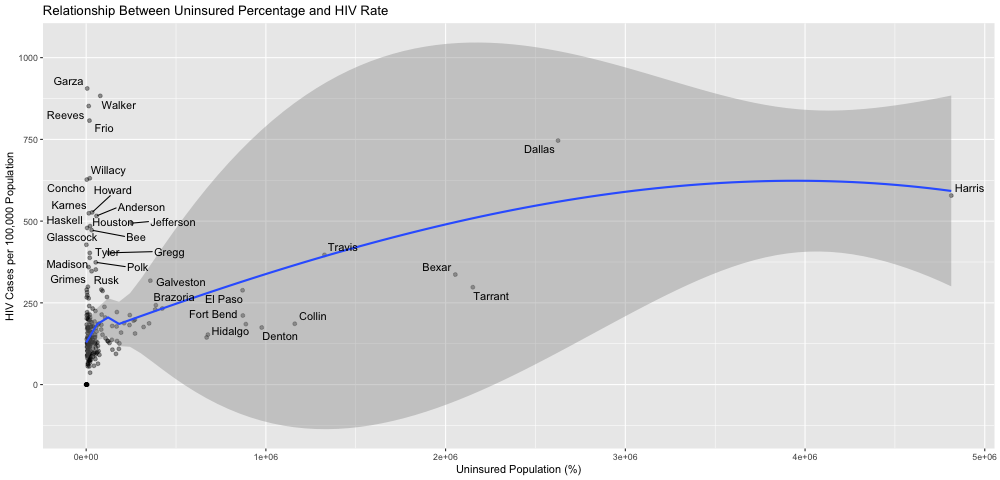

In [31]:
%%R -w 1000

library(ggrepel)
ggplot(tx_cleaned %>% filter(county!="Borden")) + 
  aes(x = july1_2022_pop_est, y = hiv_rate_per_100k) + 
  geom_point(alpha=.4) + 
  geom_smooth() +
  geom_text_repel(aes(label=county)) +
  labs(title = "Relationship Between Uninsured Percentage and HIV Rate",
       x = "Uninsured Population (%)",
       y = "HIV Cases per 100,000 Population")

In [32]:
%%R
multi_model <- lm(hiv_rate_per_100k ~ 
                 poverty_rate + july1_2022_pop_est +
                 uninsured_percent + 
                 bachelors_or_higher + 
                 unemployment_rate, 
                 data = tx_cleaned)

In [33]:
%%R
summary(multi_model)
#again, a super low r squared and high p-value indicates barely any correlation 


Call:
lm(formula = hiv_rate_per_100k ~ poverty_rate + july1_2022_pop_est + 
    uninsured_percent + bachelors_or_higher + unemployment_rate, 
    data = tx_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-281.16  -91.51  -50.78    6.71 2735.23 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          3.676e+02  1.604e+02   2.292   0.0230 *
poverty_rate         1.495e+00  3.904e+00   0.383   0.7021  
july1_2022_pop_est   9.291e-05  4.213e-05   2.206   0.0286 *
uninsured_percent   -7.964e+00  5.712e+00  -1.394   0.1648  
bachelors_or_higher -1.231e+00  2.912e+00  -0.423   0.6730  
unemployment_rate   -1.291e+00  9.112e+00  -0.142   0.8875  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248.2 on 194 degrees of freedom
  (54 observations deleted due to missingness)
Multiple R-squared:  0.03665,	Adjusted R-squared:  0.01183 
F-statistic: 1.476 on 5 and 194 DF,  p-value: 0.1993

